In [ ]:
# Install required packages
#!pip install tensorflow keras numpy matplotlib

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical


In [ ]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Cuantos ejemplos tiene el traing set?
#X_train.shape
# Cuantos ejemplos tiene el test set?
X_test.shape
# Que dimensiones tienen las imagenes en el training y test sets?

# En este data set cuales son las posible clases o outputs?


(10000, 28, 28)

In [ ]:
# Preprocess the data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


Epoch 1/2
469/469 [==============================] - 37s 76ms/step - loss: 0.2236 - accuracy: 0.9363 - val_loss: 0.0892 - val_accuracy: 0.9722
Epoch 2/2
313/313 [==============================] - 3s 9ms/step - loss: 0.0575 - accuracy: 0.9816
Test Loss: 0.057529743760824203
Test Accuracy: 0.9815999865531921
1/1 [==============================] - 0s 97ms/step


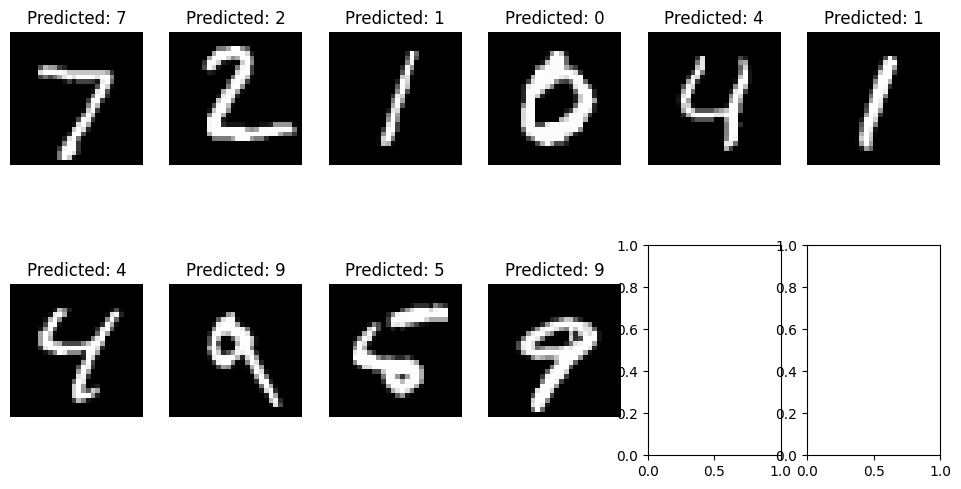

In [ ]:
# Build the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=2, batch_size=128, validation_data=(X_test, y_test))

# Si añades mas epocs mejora la acuracy del modelo? No pongas mas de 5 epochs porque tarda en entrenar.



# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Make predictions
predictions = model.predict(X_test[:10])
predicted_labels = np.argmax(predictions, axis=1)

# Plot the predictions
fig, axs = plt.subplots(2, 6, figsize=(12, 6))
axs = axs.flatten()
for i in range(10):
    axs[i].imshow(X_test[i].reshape(28, 28), cmap='gray')
    axs[i].set_title("Predicted: {}".format(predicted_labels[i]))
    axs[i].axis('off')
plt.show()